In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import tensorflow_probability as tfp

In [ ]:
gdrdata = pd.read_csv('/content/gdr parameters theoretical.csv')
gdrdata

,Z,A,delta,El,Eta,E1[MeV],W1[MeV],E2[MeV],W2[MeV]
0,14,35,0.200000,Si,1.000,21.27,7.76,21.27,7.76
1,14,36,0.222222,Si,1.216,18.63,5.41,22.29,9.55
2,14,37,0.243243,Si,1.310,17.55,4.95,22.51,9.49
3,14,38,0.263158,Si,1.305,17.45,4.81,22.29,9.11
4,14,39,0.282051,Si,1.301,17.32,4.68,22.08,8.87
...,...,...,...,...,...,...,...,...,...
5981,110,335,0.343284,10,1.198,10.31,2.33,12.17,3.41
5982,110,336,0.345238,10,1.198,10.30,2.33,12.15,3.41
5983,110,337,0.347181,10,1.177,10.40,2.35,12.08,3.38
5984,110,338,0.349112,10,1.177,10.38,2.35,12.06,3.37


In [ ]:
gdrdata.head(15)

,Z,A,delta,El,Eta,E1[MeV],W1[MeV],E2[MeV],W2[MeV]
0,14,35,0.200000,Si,1.000,21.27,7.76,21.27,7.76
1,14,36,0.222222,Si,1.216,18.63,5.41,22.29,9.55
2,14,37,0.243243,Si,1.310,17.55,4.95,22.51,9.49
3,14,38,0.263158,Si,1.305,17.45,4.81,22.29,9.11
4,14,39,0.282051,Si,1.301,17.32,4.68,22.08,8.87
5,14,40,0.300000,Si,1.364,16.61,4.33,22.12,8.52
6,14,41,0.317073,Si,1.368,16.42,4.13,21.93,7.93
7,14,42,0.333333,Si,1.415,15.89,3.82,21.89,7.34
8,14,43,0.348837,Si,1.323,16.48,4.07,21.34,7.31
9,14,44,0.363636,Si,1.296,16.57,4.13,21.03,7.27


In [ ]:
ade2 = gdrdata.drop(['Z','El','Eta','E1[MeV]','E2[MeV]','W1[MeV]','W2[MeV]'],axis = 1).to_numpy()
ade2

array([[3.50000000e+01, 2.00000000e-01],
       [3.60000000e+01, 2.22222222e-01],
       [3.70000000e+01, 2.43243243e-01],
       ...,
       [3.37000000e+02, 3.47181009e-01],
       [3.38000000e+02, 3.49112426e-01],
       [3.39000000e+02, 3.51032448e-01]])

In [ ]:
y = gdrdata['E2[MeV]'].to_numpy()
y

array([21.27, 22.29, 22.51, ..., 12.08, 12.06, 11.53])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ade2, y,train_size = 0.85)
print(len(x_train))

5088


In [ ]:
x_train.shape, x_test.shape

((5088, 2), (898, 2))

In [ ]:
x_train[:,1]

array([0.35606061, 0.35514019, 0.30434783, ..., 0.2516129 , 0.15789474,
       0.16587678])

In [ ]:
ade2

array([[3.50000000e+01, 2.00000000e-01],
       [3.60000000e+01, 2.22222222e-01],
       [3.70000000e+01, 2.43243243e-01],
       ...,
       [3.37000000e+02, 3.47181009e-01],
       [3.38000000e+02, 3.49112426e-01],
       [3.39000000e+02, 3.51032448e-01]])

In [ ]:
hidden_units = [10, 10]
learning_rate = 0.001
num_epochs = 100

def run_experiment(model, loss, x_train,y_train,x_test,y_test):

    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss=loss,
        metrics=[keras.metrics.RootMeanSquaredError()],
    )

    print("Start training the model...")
    model.fit(x_train,y_train, epochs=num_epochs, validation_data=(x_test,y_test))
    print("Model training finished.")
    _, rmse = model.evaluate(x_train,y_train, verbose=0)
    print(f"Train RMSE: {round(rmse, 3)}")

    print("Evaluating model performance...")
    _, rmse = model.evaluate(x_test,y_test, verbose=0)
    print(f"Test RMSE: {round(rmse, 3)}")


In [ ]:
# FEATURE_NAMES = [
#   "A",
#   "E2[MeV]"
# ]


# def create_model_inputs():
#     inputs = {}
#     for feature_name in FEATURE_NAMES:
#         inputs[feature_name] = layers.Input(
#             name=feature_name, shape=(1,), dtype=tf.float32
#         )
#     return inputs

In [ ]:
# Define the prior weight distribution as Normal of mean=0 and stddev=1.
# Note that, in this example, the we prior distribution is not trainable,
# as we fix its parameters.
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    prior_model = keras.Sequential(
        [
            tfp.layers.DistributionLambda(
                lambda t: tfp.distributions.MultivariateNormalDiag(
                    loc=tf.zeros(n), scale_diag=tf.ones(n)
                )
            )
        ]
    )
    return prior_model


# Define variational posterior weight distribution as multivariate Gaussian.
# Note that the learnable parameters for this distribution are the means,
# variances, and covariances.
def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n),
        ]
    )
    return posterior_model


In [ ]:
def create_bnn_model(train_size):
    inputs = layers.Input(shape=(2,), name="input")
    features = layers.BatchNormalization()(inputs)

    # Create hidden layers with weight uncertainty using the DenseVariational layer.
    for units in hidden_units:
        features = tfp.layers.DenseVariational(
            units=units,
            make_prior_fn=prior,
            make_posterior_fn=posterior,
            kl_weight=1 / train_size,
            activation="sigmoid",
        )(features)

    # The output is a distribution of possible values, so we use the tfp.layers.DistributionLambda layer.
    outputs = tfp.layers.DenseVariational(
        units=1,
        make_prior_fn=prior,
        make_posterior_fn=posterior,
        kl_weight=1 / train_size,
    )(features)
    outputs = tfp.layers.DistributionLambda(lambda x: tfp.distributions.Normal(loc=x, scale=1))(outputs)

    model = keras.Model(inputs=inputs, outputs=outputs)

    return model

In [ ]:
num_epochs = 500
mse_loss = keras.losses.MeanSquaredError()
bnn_model_small = create_bnn_model(int(x_train.size * 0.3))
run_experiment(bnn_model_small, mse_loss, x_train,y_train,x_test,y_test)

Start training the model...
Epoch 1/500
159/159 [==============================] - 7s 16ms/step - loss: 221.7570 - root_mean_squared_error: 14.8913 - val_loss: 192.2372 - val_root_mean_squared_error: 13.8648
Epoch 2/500
159/159 [==============================] - 1s 7ms/step - loss: 188.2698 - root_mean_squared_error: 13.7209 - val_loss: 175.3741 - val_root_mean_squared_error: 13.2427
Epoch 3/500
159/159 [==============================] - 1s 9ms/step - loss: 159.6097 - root_mean_squared_error: 12.6334 - val_loss: 149.7957 - val_root_mean_squared_error: 12.2388
Epoch 4/500
159/159 [==============================] - 1s 8ms/step - loss: 132.4024 - root_mean_squared_error: 11.5063 - val_loss: 114.7274 - val_root_mean_squared_error: 10.7108
Epoch 5/500
159/159 [==============================] - 1s 7ms/step - loss: 101.4737 - root_mean_squared_error: 10.0730 - val_loss: 80.3761 - val_root_mean_squared_error: 8.9648
Epoch 6/500
159/159 [==============================] - 1s 5ms/step - loss: 68.

In [ ]:
x_train.size

10176

In [ ]:
x_train

array([[2.64000000e+02, 3.56060606e-01],
       [2.14000000e+02, 3.55140187e-01],
       [9.20000000e+01, 3.04347826e-01],
       ...,
       [1.55000000e+02, 2.51612903e-01],
       [2.09000000e+02, 1.57894737e-01],
       [2.11000000e+02, 1.65876777e-01]])

In [ ]:
bnn_model_small.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 batch_normalization (BatchN  (None, 2)                8         
 ormalization)                                                   
                                                                 
 dense_variational (DenseVar  (None, 10)               495       
 iational)                                                       
                                                                 
 dense_variational_1 (DenseV  (None, 10)               6215      
 ariational)                                                     
                                                                 
 dense_variational_2 (DenseV  (None, 1)                77        
 ariational)                                                 

In [ ]:
bnn_model_small.evaluate(x_train,y_train)

159/159 [==============================] - 0s 2ms/step - loss: 1.6189 - root_mean_squared_error: 1.2518


[1.618918776512146, 1.2517659664154053]

In [ ]:
_, rmse_1 = bnn_model_small.evaluate(x_train, y_train, verbose=0)
print(f"Test RMSE: {rmse_1}")

Test RMSE: 1.221352219581604


In [ ]:
y_pred = bnn_model_small.predict(ade2)
y_pred

188/188 [==============================] - 1s 2ms/step


array([[17.924719],
       [18.94829 ],
       [20.68822 ],
       ...,
       [13.125227],
       [11.618584],
       [11.899633]], dtype=float32)

In [ ]:
y.shape

(5986,)

In [ ]:
y_pred.shape

(5986, 1)

In [ ]:
y_pred.reshape(-1)

array([17.924719, 18.94829 , 20.68822 , ..., 13.125227, 11.618584,
       11.899633], dtype=float32)

In [ ]:
y_pred.shape

(5986, 1)

In [ ]:
df1 = (pd.DataFrame([ade2[:,0],ade2[:,1],y,y_pred.reshape(-1)]).T)
df1

,0,1,2,3
0,35.0,0.200000,21.27,17.924719
1,36.0,0.222222,22.29,18.948290
2,37.0,0.243243,22.51,20.688219
3,38.0,0.263158,22.29,19.411530
4,39.0,0.282051,22.08,20.107267
...,...,...,...,...
5981,335.0,0.343284,12.17,13.048145
5982,336.0,0.345238,12.15,12.135809
5983,337.0,0.347181,12.08,13.125227
5984,338.0,0.349112,12.06,11.618584


In [ ]:
ade1 = gdrdata.drop(['Z','El','Eta','E1[MeV]','E2[MeV]','W1[MeV]','W2[MeV]'],axis = 1).to_numpy()
ade1

array([[3.50000000e+01, 2.00000000e-01],
       [3.60000000e+01, 2.22222222e-01],
       [3.70000000e+01, 2.43243243e-01],
       ...,
       [3.37000000e+02, 3.47181009e-01],
       [3.38000000e+02, 3.49112426e-01],
       [3.39000000e+02, 3.51032448e-01]])

In [ ]:
y1 = gdrdata['E1[MeV]'].to_numpy()
y1

array([21.27, 18.63, 17.55, ..., 10.4 , 10.38,  8.3 ])

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(ade1, y1,train_size = 0.85)
print(len(x1_train))

5088


In [ ]:
num_epochs = 500
mse_loss = keras.losses.MeanSquaredError()
bnn_model_small_1 = create_bnn_model(int(x1_train.size * 0.3))
run_experiment(bnn_model_small_1, mse_loss, x1_train,y1_train,x1_test,y1_test)

Start training the model...
Epoch 1/500
159/159 [==============================] - 4s 10ms/step - loss: 157.2060 - root_mean_squared_error: 12.5380 - val_loss: 147.6617 - val_root_mean_squared_error: 12.1514
Epoch 2/500
159/159 [==============================] - 1s 4ms/step - loss: 136.0926 - root_mean_squared_error: 11.6656 - val_loss: 134.2344 - val_root_mean_squared_error: 11.5857
Epoch 3/500
159/159 [==============================] - 1s 4ms/step - loss: 117.2875 - root_mean_squared_error: 10.8297 - val_loss: 93.8913 - val_root_mean_squared_error: 9.6894
Epoch 4/500
159/159 [==============================] - 1s 3ms/step - loss: 89.9917 - root_mean_squared_error: 9.4860 - val_loss: 74.7253 - val_root_mean_squared_error: 8.6440
Epoch 5/500
159/159 [==============================] - 1s 3ms/step - loss: 61.6065 - root_mean_squared_error: 7.8485 - val_loss: 44.7050 - val_root_mean_squared_error: 6.6855
Epoch 6/500
159/159 [==============================] - 1s 4ms/step - loss: 38.3805 - r

In [ ]:
bnn_model_small_1.evaluate(x1_train,y1_train)

159/159 [==============================] - 0s 3ms/step - loss: 2.3054 - root_mean_squared_error: 1.5016


[2.305351734161377, 1.5016489028930664]

In [ ]:
_, rmse_2 = bnn_model_small_1.evaluate(x1_train, y1_train, verbose=0)
print(f"Test RMSE: {rmse_2}")

Test RMSE: 1.5122379064559937


In [ ]:
y_pred1 = bnn_model_small_1.predict(ade1)
y_pred1

188/188 [==============================] - 1s 2ms/step


array([[17.649935],
       [18.527733],
       [16.88272 ],
       ...,
       [10.947329],
       [ 9.982547],
       [10.118607]], dtype=float32)

In [ ]:
y_pred1.reshape(-1)

array([17.649935, 18.527733, 16.88272 , ..., 10.947329,  9.982547,
       10.118607], dtype=float32)

In [ ]:
df2 = (pd.DataFrame([ade1[:,0],ade1[:,1],y1,y_pred1.reshape(-1)]).T)
df2

,0,1,2,3
0,35.0,0.200000,21.27,17.649935
1,36.0,0.222222,18.63,18.527733
2,37.0,0.243243,17.55,16.882721
3,38.0,0.263158,17.45,18.086918
4,39.0,0.282051,17.32,16.633247
...,...,...,...,...
5981,335.0,0.343284,10.31,11.502424
5982,336.0,0.345238,10.30,9.705173
5983,337.0,0.347181,10.40,10.947329
5984,338.0,0.349112,10.38,9.982547


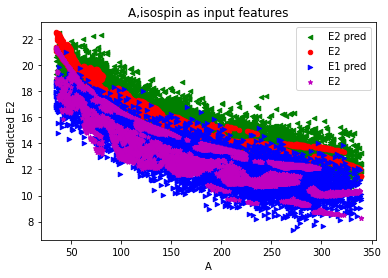

In [ ]:
ax = df1.plot(kind='scatter', x=0, y=3, marker='<',color = 'g',label="E2 pred")
ax1 = df1.plot(kind = 'scatter',x=0 , y=2,marker = 'o',color = 'r',label="E2",ax = ax)
ax2 = df2.plot(kind = 'scatter',x=0,y=3,marker='>',color = 'b',label = "E1 pred",ax = ax)
ax3 = df2.plot(kind = 'scatter',x=0,y=2,marker='*',color = 'm',label = "E2",ax = ax)
ax.set_xlabel('A')
ax.set_ylabel('Predicted E2')
ax.set_title('A,isospin as input features')
plt.show()